<a href="https://colab.research.google.com/github/ndhend/Winc_assignments/blob/main/Final3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final assignment - CO2 emissions






In [ ]:
#import code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/ndhend/csv_data_winc/main/owid-co2-data.csv'

df = pd.read_csv(url)
# display(df)
# unique_gdp_count = len(df['gdp'].unique())
# print("Number of unique GDP values:", unique_gdp_count)

# display(df.columns)

# energy_per_capita	Primary energy consumption per capita, measured in kilowatt-hours per person per year.

df = df[['country',
         'year',
         'co2_per_capita',
         'energy_per_capita',
         'consumption_co2_per_capita']]

df2 = df.loc[df['year'] == 2018]
display(df2)


,country,year,co2_per_capita,energy_per_capita,consumption_co2_per_capita
168,Afghanistan,2018,0.295,924.251,NaN
440,Africa,2018,1.055,4195.228,0.759
612,Africa (GCP),2018,NaN,NaN,NaN
784,Aland Islands,2018,NaN,NaN,NaN
956,Albania,2018,1.732,14609.701,2.089
...,...,...,...,...,...
49806,Western Sahara,2018,NaN,2044.897,NaN
50078,World,2018,4.793,21005.615,4.793
50250,Yemen,2018,0.340,1170.726,NaN
50422,Zambia,2018,0.416,3494.537,0.470


Primary energy sources, including both fossil and renewable sources, play a crucial role in the global energy mix and have significant implications for energy security, economic development, and environmental sustainability.

Therefore I decided to focus on primary energy

output pearson correlation = 0.749745
According to Rea and Parker there is a strong positive relationship
between co2-emissions and energy (between 0.6 < 0.8)
This is a good reason to continue on this path

In [ ]:
from numpy.core.multiarray import inner
energy = pd.read_csv('https://raw.githubusercontent.com/owid/energy-data/master/owid-energy-data.csv')
# display(energy)
# energy['year'].unique()
energy2 = energy.loc[energy['year'] == 2018].reset_index(drop=True)
# energy2.dropna()
# energy2.columns
# Fossil_energy:
# Per capita fossil fuel consumption, measured in kilowatt-hours. This is the sum of primary energy from coal, oil and gas.
# biofuel_cons_per_capita	Per capita primary energy consumption from biofuels, measured in kilowatt-hours
energy_data = energy2[['country',
                       'year',
                       'population',
                       'gdp',
                       'hydro_energy_per_capita',
                       'solar_energy_per_capita',
                       'wind_energy_per_capita']]

# display(energy_data)
# # Drop missing data from both DataFrames
# energy_data = energy_data.dropna()
# df2 = df2.dropna()

# # Reset index for both DataFrames
# energy_data.reset_index(drop=True, inplace=True)
# df2.reset_index(drop=True, inplace=True)

# Merge the DataFrames
co2_energy = pd.merge(energy_data, df2, on=['country','year'], how='inner')
# display(co2_energy)
co2_emission_energy = co2_energy.dropna()
display(co2_emission_energy)


co2_vs_energy = co2_emission_energy[[ 'co2_per_capita',	'energy_per_capita']].dropna()
# display(co2_vs_energy)

#calculate pearson correlation
co2_vs_energy.corr() # output 0.749745
# According to Rea and Parker there is a strong positive relationship
# between co2-emissions and energy (between 0.6 <)











,country,year,population,gdp,hydro_energy_per_capita,solar_energy_per_capita,wind_energy_per_capita,co2_per_capita,energy_per_capita,consumption_co2_per_capita
8,Argentina,2018,4.441359e+07,8.293733e+11,1922.847,6.441,84.157,4.066,22163.160,3.968
12,Australia,2018,2.497923e+07,1.238560e+12,1833.566,1306.227,1722.419,16.665,65072.668,14.630
13,Austria,2018,8.840518e+06,3.822695e+11,11264.006,435.482,1804.744,7.529,46186.543,10.334
14,Azerbaijan,2018,1.015252e+07,1.604262e+11,460.737,10.231,21.551,3.406,16897.240,3.492
17,Bangladesh,2018,1.636840e+08,6.865218e+11,13.988,4.446,0.082,0.504,2630.028,0.779
...,...,...,...,...,...,...,...,...,...,...
212,Ukraine,2018,4.444695e+07,4.313199e+11,620.714,65.924,70.740,5.212,22768.459,4.800
214,United Kingdom,2018,6.643300e+07,2.540210e+12,216.782,504.525,2266.374,5.716,33771.496,8.065
215,United States,2018,3.321400e+08,1.814065e+13,2306.186,751.230,2193.926,16.188,80583.344,17.477
222,Vietnam,2018,9.491433e+07,6.614884e+11,2355.122,2.927,13.575,2.889,11443.453,1.820


,co2_per_capita,energy_per_capita
co2_per_capita,1.000000,0.855908
energy_per_capita,0.855908,1.000000


# 1. Biggest predictor CO2 output per capita of a country

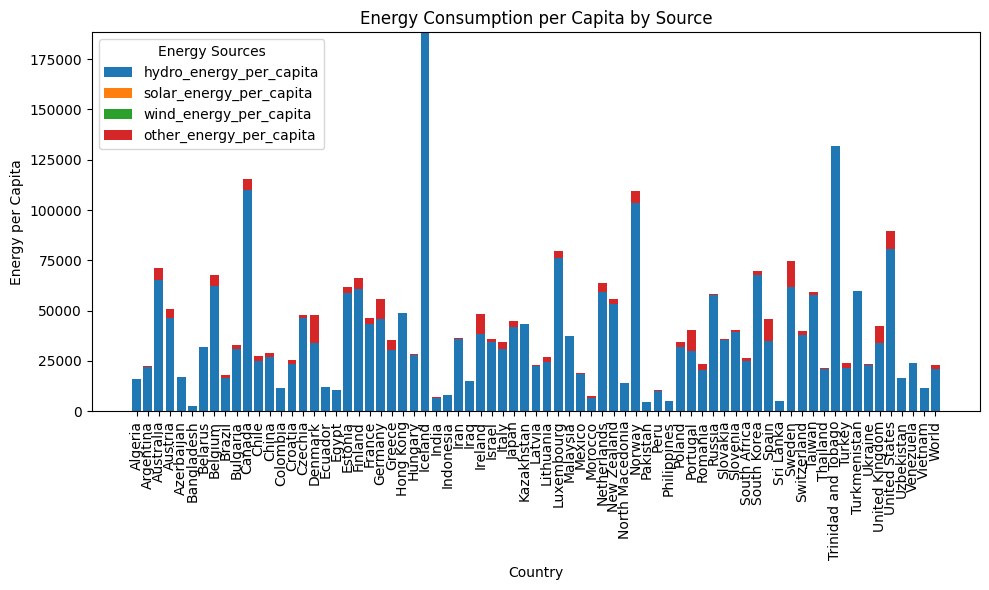

In [ ]:
# display(co2_emission_energy)
# co2_emission_energy.columns.tolist()
# Calculate fossil energy per capita
co2_emission_energy['other_energy_per_capita'] = co2_emission_energy['energy_per_capita'] - \
    co2_emission_energy[['hydro_energy_per_capita', 'solar_energy_per_capita', 'wind_energy_per_capita']].sum(axis=1)

# Plotting
plt.figure(figsize=(10, 6))

# Select energy sources for plotting (including fossil energy)
energy_sources = ['hydro_energy_per_capita', 'solar_energy_per_capita', 'wind_energy_per_capita', 'other_energy_per_capita']

# Get the countries as x-axis labels
countries = co2_emission_energy['country']

# Create a variable to keep track of the bottom position for each bar
bottom = None

# Iterate through energy sources and plot a stacked bar for each
for source in energy_sources:
    if bottom is None:
        plt.bar(countries, co2_emission_energy[source], label=source)
        bottom = co2_emission_energy[source]
    else:
        plt.bar(countries, co2_emission_energy[source], bottom=bottom, label=source)
        bottom += co2_emission_energy[source]

plt.title('Energy Consumption per Capita by Source')
plt.xlabel('Country')
plt.ylabel('Energy per Capita')
plt.xticks(rotation=90)
plt.legend(title='Energy Sources')
plt.tight_layout()
plt.show()

What are the correlations between the different kinds of energies and co2-emissions? Strangely, other energy sources (excluding wind, hydro and solar) have a negative correlation with the total c02_emission per capita. As this is a small part of a large dataset, this maybe means that inhabitants work hard on not using fossil fuel, while the country as a whole produces more co2-emissions. In other words, while inhabitants try hard not to use fossil fuel, but non-fossil fuel energy, it looks like the more the inhabitants do that and the less they use fossil fuel, the more the country as a whole produces co2-emissions.

Consumption seems to have a stronger correlation with co2emissions than energy, but there was only data of consumption from 2022

In [ ]:

co2_vs_hydro_energy = co2_emission_energy[[ 'co2_per_capita',	'hydro_energy_per_capita']].dropna()
# display(co2_vs_hydro_energy)

#calculate pearson correlation
# co2_vs_hydro_energy.corr() # output 0.750198

# co2_vs_solar_energy = co2_emission_energy[[ 'co2_per_capita',	'solar_energy_per_capita']].dropna()
# co2_vs_solar_energy.corr() # output 0.281978

# co2_vs_wind_energy = co2_emission_energy[[ 'co2_per_capita',	'wind_energy_per_capita']].dropna()
# co2_vs_wind_energy.corr() # output 0.152657

# co2_vs_other_energy = co2_emission_energy[[ 'co2_per_capita',	'other_energy_per_capita']].dropna()
# co2_vs_other_energy.corr() # output -0.17896

co2_vs_consumption = co2_emission_energy[[ 'co2_per_capita',	'consumption_co2_per_capita']].dropna()
co2_vs_consumption.corr() # output: 0.807992



,co2_per_capita,consumption_co2_per_capita
co2_per_capita,1.000000,0.807992
consumption_co2_per_capita,0.807992,1.000000


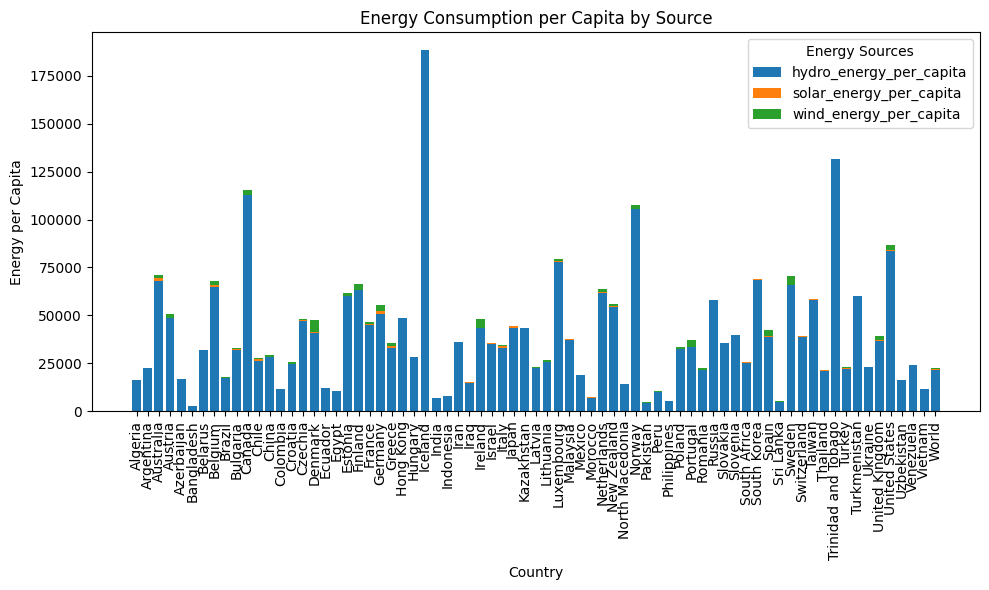

# 2. Biggest strides in decreasing CO2 output

# 3. Best price non-fossil fuel energy technology in the future?
In this dataset I only had three non-fossil fuel energy sources: hydro, wind and solar. There are more non-fossil fuel energy sources but I decided to stick to these three, as they are the most well-known sources of non-fossil fuel energy.

From the 3 in my dataset, hydro is clearly used the most in 2018. Therefore, as more inhabitants use hydro-energy, I think this non-fossil fuel energy technology will have the best price in the future.

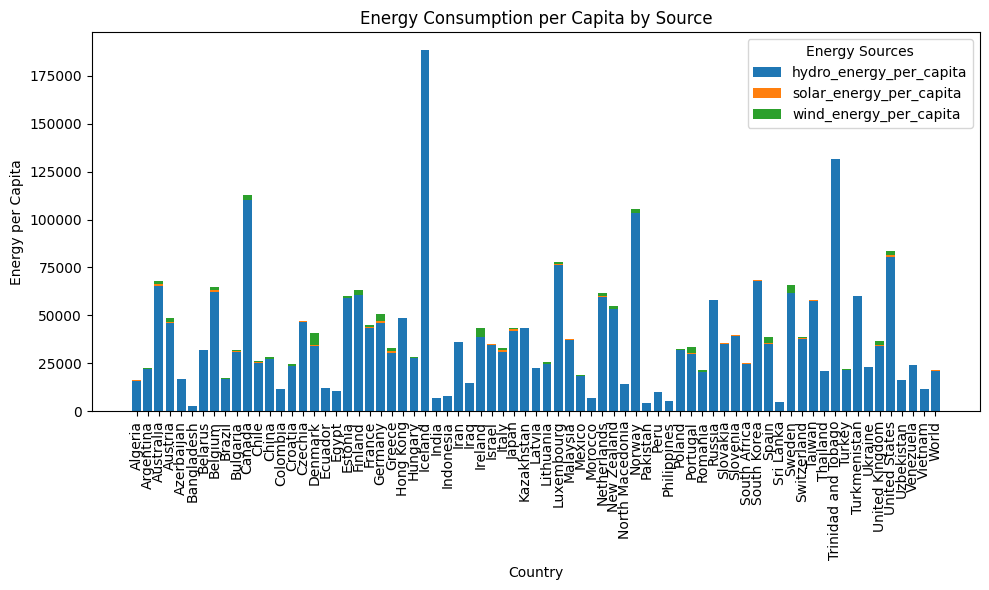

In [ ]:
# Get the countries as x-axis labels
co2_emission_energy = co2_emission_energy.reset_index(drop=True)
# display(co2_emission_energy)

# Plotting
plt.figure(figsize=(10, 6))

# Select energy sources for plotting (including fossil energy)
energy_sources = ['hydro_energy_per_capita', 'solar_energy_per_capita', 'wind_energy_per_capita']

# Get the countries as x-axis labels
countries = co2_emission_energy['country']

# Create a variable to keep track of the bottom position for each bar
bottom = None

# Iterate through energy sources and plot a stacked bar for each
for source in energy_sources:
    if bottom is None:
        plt.bar(countries, co2_emission_energy[source], label=source)
        bottom = co2_emission_energy[source]
    else:
        plt.bar(countries, co2_emission_energy[source], bottom=bottom, label=source)
        bottom += co2_emission_energy[source]

plt.title('Energy Consumption per Capita by Source')
plt.xlabel('Country')
plt.ylabel('Energy per Capita')
plt.xticks(rotation=90)
plt.legend(title='Energy Sources')
plt.tight_layout()
plt.show()

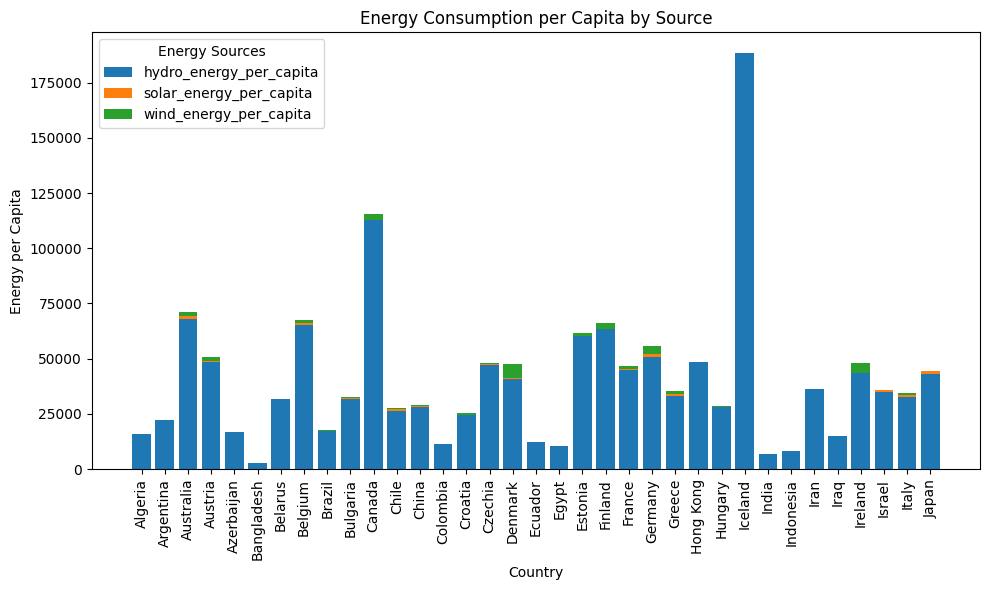